In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier   

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
train_data = pd.read_csv('training.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
train_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
train_data['event'] = data['event'].replace({0: 1, 1: 0})

# Extract the target column
train_target = train_data['event']

# Fill missing values with the mean
train_data.fillna(data.mean(), inplace=True)

#Prepare data use in ML algorithms
X = train_data.drop('event', axis=1).values
y = train_target.values

# Print out the percentage of samples that have the event
print('Default %:', target.sum() / target.shape[0] * 100)


Default %: 2.5255824080121925


In [21]:
import pandas as pd
from sklearn import preprocessing

# Load test data into a pandas DataFrame
test_data = pd.read_csv('test.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
test_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
test_data['event'] = test_data['event'].replace({0: 1, 1: 0})

# Extract the target column
test_target = test_data['event']

# Fill missing values with the mean from the training data
test_data.fillna(train_data.mean(), inplace=True)

X_test = test_data.drop('event', axis=1).values
y_test = test_target.values

# Print out the percentage of samples that have the event
print('Default %:', test_target.sum() / test_target.shape[0] * 100)


Default %: 2.5004605670836892


In [22]:
import scorecardpy as sc
print(pd.__version__)

# Create woebin bins
bins = sc.woebin(train_data, y ="event", num_breaks=5, min_perc_fine=0.05, min_perc_coarse=0.1)

# Concatenate the bins into a single DataFrame
bins_df = pd.concat([pd.DataFrame(bins[var]) for var in bins])

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:17


In [23]:
bins_df


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,var5,"[-inf,inf)",238836,1.000000,6032,232804,0.974744,0.000000,0.000000e+00,0.000000,inf,False
0,var3,"[-inf,inf)",238836,1.000000,6032,232804,0.974744,0.000000,0.000000e+00,0.000000,inf,False
0,var7,"[-inf,23.0)",218377,0.914339,5581,212796,0.974443,-0.012152,1.358094e-04,0.001693,23.0,False
1,var7,"[23.0,inf)",20459,0.085661,451,20008,0.977956,0.139302,1.556787e-03,0.001693,inf,False
0,var1,"[-inf,1.87395141164643)",109981,0.460488,2279,107702,0.979278,0.202513,1.717538e-02,0.067892,1.87395141164643,False
1,var1,"[1.87395141164643,3.0)",114637,0.479982,3007,111630,0.973769,-0.038871,7.387843e-04,0.067892,3.0,False
2,var1,"[3.0,inf)",14218,0.059530,746,13472,0.947531,-0.759475,4.997750e-02,0.067892,inf,False
0,var2,"[-inf,500000.0)",50175,0.210081,1795,48380,0.964225,-0.359037,3.222904e-02,0.220049,500000.0,False
1,var2,"[500000.0,1000000.0)",12392,0.051885,220,12172,0.982247,0.360148,5.694719e-03,0.220049,1000000.0,False
2,var2,"[1000000.0,5500000.0)",33648,0.140883,354,33294,0.989479,0.890717,7.511063e-02,0.220049,5500000.0,False


-------- 1/2 var1 --------
>>> dt[var1].describe(): 
count    238836.000000
mean          1.873951
std           2.799147
min           1.000000
25%           1.000000
50%           1.873951
75%           1.873951
max         121.000000
Name: var1, dtype: float64 



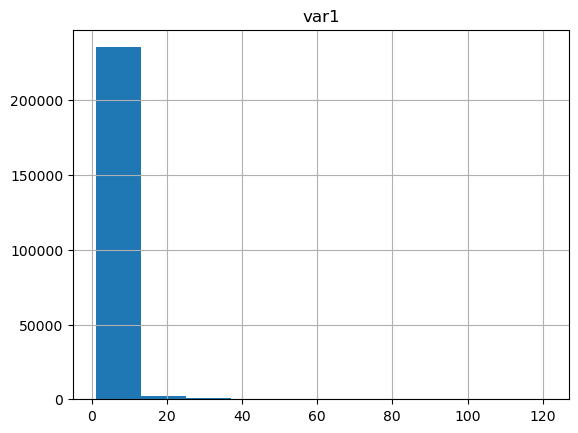

>>> Current breaks:
1.87395141164643,3.0 



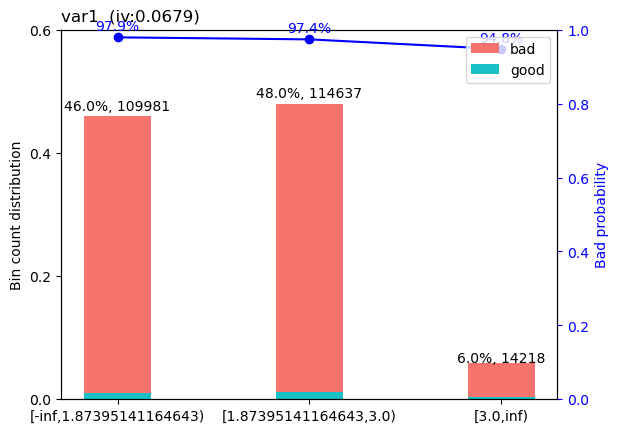

>>> Adjust breaks for (1/2) var1?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/2 var2 --------
>>> dt[var2].describe(): 
count    2.388360e+05
mean     5.989773e+06
std      2.411050e+07
min      0.000000e+00
25%      8.594481e+05
50%      5.989773e+06
75%      5.989773e+06
max      2.817428e+09
Name: var2, dtype: float64 



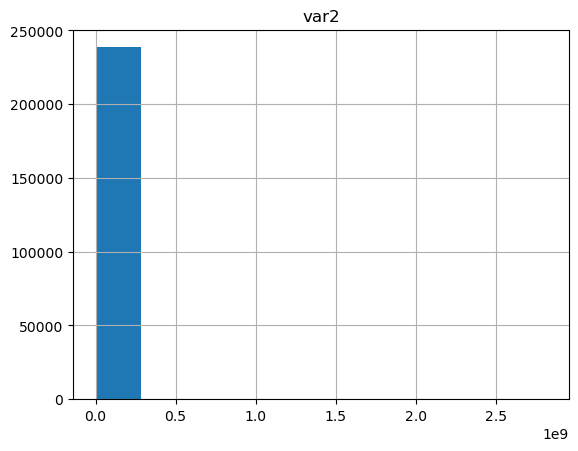

>>> Current breaks:
500000.0,1000000.0,5500000.0,6000000.0 



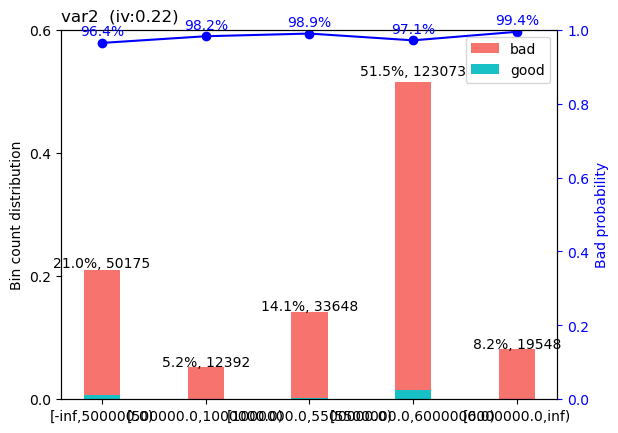

>>> Adjust breaks for (2/2) var2?
1: next 
2: yes 
3: back
Selection: 1
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:11


In [24]:
# binning adjustment - optimizing the binning results and improving the accuracy 
# adjust breaks interactively
breaks_adj = sc.woebin_adj(train_data, y="event", bins=bins) 
#or specify bin breaks manually
bins_adj = sc.woebin(train_data, y="event", breaks_list=breaks_adj)

Number of class 1 examples before: (6032, 8)
Number of class 1 examples after: (232804, 8)
(238836, 8)
(232804, 8)
(238836,)
(232804,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

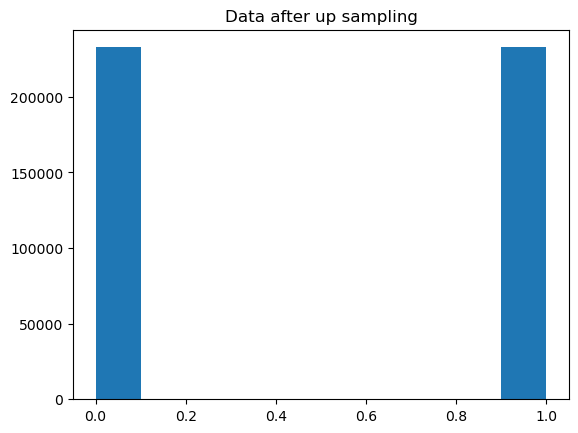

In [32]:
#Up-sampling - address class imbalance / prevent bias toward majority class
from sklearn.utils import resample

train_data['event'].replace({0:1, 1:0},inplace=True)

X_train=train_data.drop("event" ,axis= 1)
y_train=train_target

print('Number of class 1 examples before:', X_train[y_train == 1].shape)



X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

#UPSAMPLE


print(X_train.shape)
print(X_upsampled.shape)
print(y_train.shape)
print(y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
plt.title('Data after up sampling')
plt.hist(y_bal)

(465608, 8)
(59709, 8)
(465608,)
(59709,)


(array([232804.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 232804.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

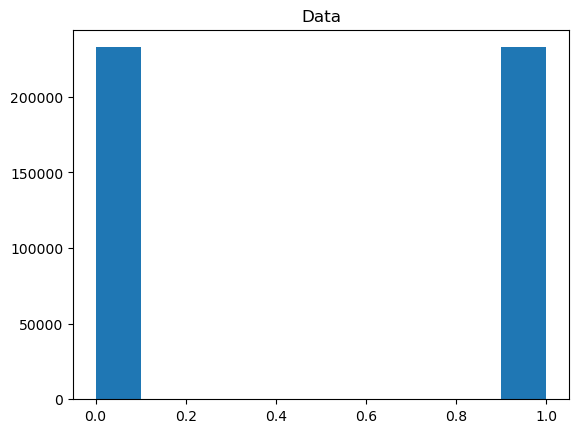

In [33]:
from sklearn.model_selection import train_test_split

X_train=X_bal
X_test
y_train=y_bal
y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.title('Data')
plt.hist(y_train)

In [37]:
X_train=pd.DataFrame(X_train,columns=train_data.columns[1:])

In [40]:
# converting train and test into woe values
train_woe = sc.woebin_ply(X_train, bins)
test_woe = sc.woebin_ply(pd.DataFrame(X_test, columns=X_train.columns), bins)

X_train = train_woe
X_test = pd.DataFrame(test_woe, columns=X_train.columns)

# continue with the rest of your code


[INFO] converting into woe values ...
Woe transformating on 465608 rows and 8 columns in 00:00:13
[INFO] converting into woe values ...


In [41]:
#Logistic regression grid search

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

for i in X_train.columns:
    gs = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid, 
                      scoring='f1', 
                      refit=True,
                      cv=5,
                      n_jobs=-1)
    gs = gs.fit(pd.DataFrame(X_train[i]), y_train)
    print(i)
    print(gs.best_score_)
    print(gs.best_params_)

var5_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var3_woe
0.13333237877735699
{'logisticregression__C': 0.001}
var7_woe
0.6514624546523451
{'logisticregression__C': 0.001}
var1_woe
0.5764657927484098
{'logisticregression__C': 0.001}
var2_woe
0.6795528575656811
{'logisticregression__C': 0.001}
var8_woe
0.6675519024410463
{'logisticregression__C': 0.001}
var4_woe
0.6128828931591146
{'logisticregression__C': 0.1}
var6_woe
0.13333237877735699
{'logisticregression__C': 0.001}


In [43]:
#Logistic regression grid search

listfeature=['var1_woe','var2_woe']

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))

param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train[listfeature], y_train)
print(gs.best_score_)
print(gs.best_params_)

0.6445042944800193
{'logisticregression__C': 0.001}


0.28841548175316956
              precision    recall  f1-score   support

           0     0.9886    0.2733    0.4282     58216
           1     0.0300    0.8768    0.0580      1493

    accuracy                         0.2884     59709
   macro avg     0.5093    0.5750    0.2431     59709
weighted avg     0.9646    0.2884    0.4190     59709



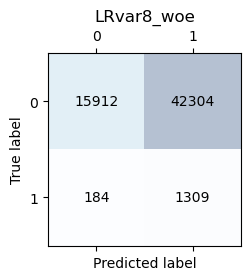

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


listfeature=['var8_woe']

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature],y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]),digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
#print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('LR'+''.join(listfeature))

plt.show()

Logistic regression
              precision    recall  f1-score   support

           0     0.9907    0.3155    0.4786     58216
           1     0.0321    0.8848    0.0619      1493

    accuracy                         0.3297     59709
   macro avg     0.5114    0.6001    0.2702     59709
weighted avg     0.9668    0.3297    0.4681     59709



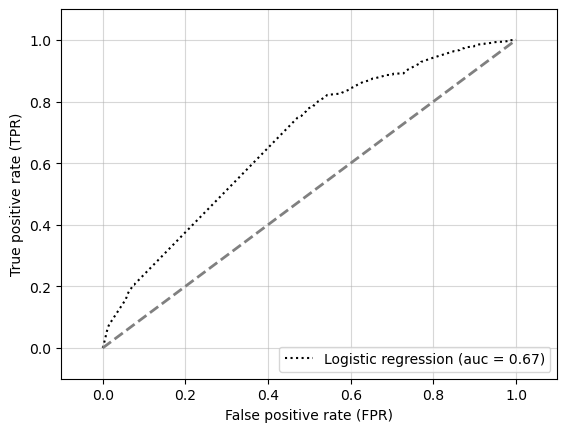

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

pipe = Pipeline([['clf', clf]])


clf_labels = ['Logistic regression']

all_clf = [pipe]


colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):
    print(label)
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    
    print(classification_report(y_test, clf.predict(X_test),digits=4))

    plt.plot(fpr, tpr,
         color=clr,
         linestyle=ls,
         label='%s (auc = %0.2f)' % (label, roc_auc))
    
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()